

*   Will do the Target encoding
* Scaling the data
*   Handle Imbalanced Data In XGBoost Using scale_pos_weight In Python



# **Basic Model - Using Cleaned Dataset**

In [2]:
!pip install matplotlib

In [3]:

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [78]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [4]:


from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',None)
import re
from sklearn.model_selection import train_test_split, cross_val_score
import math
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [5]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score

from sklearn.metrics import f1_score


In [81]:

data = pd.read_csv('/content/drive/MyDrive/NUS_SEM_2_(Jan2024_May2024)/Hands on Applied Analytics/Project/Loan Dfault Project/Data/cleaned_data.csv')

In [82]:
print(f"The Length of the data: {data.shape}")

The Length of the data: (1220092, 26)


In [83]:
data[data["loan_status"] == "Fully Paid"].shape[0]


979419

In [84]:
data[data["loan_status"] == "Charged Off"].shape[0]

240673

In [85]:
data.shape

(1220092, 26)

## Feature Engineering

Convert target variable to 0/1 indicator

In [86]:
# One hot encoding for Y
class_mapping = {"Fully Paid":0, "Charged Off":1}
data['loan_status']=data['loan_status'].map(class_mapping)

###  Categorical Variables

In [87]:
dummy_list= [column for column in data.columns if data[column].dtype == object]
print(dummy_list)

['sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'initial_list_status', 'application_type']


In [88]:
dummy_list_new = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

In [89]:
data[dummy_list_new].isnull().any()

sub_grade              False
home_ownership         False
verification_status    False
purpose                False
addr_state             False
initial_list_status    False
application_type       False
dtype: bool

In [90]:
data = pd.get_dummies(data, columns=dummy_list_new, drop_first=True)

In [91]:
data.head()

,loan_amnt,term (months),int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_Whole Funded,application_type_Joint App
0,3600.0,36,13.99,123.03,10.0,55000.0,Dec-2015,0,5.91,2003,675,679,7,0,2765.0,29.7,13,1.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,24700.0,36,11.99,820.28,10.0,65000.0,Dec-2015,0,16.06,1999,715,719,22,0,21470.0,19.2,38,4.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,20000.0,60,10.78,432.66,10.0,63000.0,Dec-2015,0,10.78,2000,695,699,6,0,7869.0,56.2,18,5.0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,10400.0,60,22.45,289.91,3.0,104433.0,Dec-2015,0,25.

In [92]:
data.shape

(1220092, 123)

## Train/Test Split

In [93]:


data['issue_d'] = pd.to_datetime(data['issue_d'])

In [94]:
data['issue_d'].sample()


721030   2014-07-01
Name: issue_d, dtype: datetime64[ns]

In [95]:
data['issue_d'].describe()

count                          1220092
mean     2015-07-29 07:38:52.399851520
min                2012-03-01 00:00:00
25%                2014-08-01 00:00:00
50%                2015-09-01 00:00:00
75%                2016-07-01 00:00:00
max                2018-12-01 00:00:00
Name: issue_d, dtype: object

There are 82 unique values. The first loans were issued in Jan 2012 and the last loans were issued in September 2018. The busiest month was Oct 2016, with 45410 loans funded in that month. Let's further check the distribution of loans funded per month.



Text(0.5, 1.0, 'Loans funded per Year')

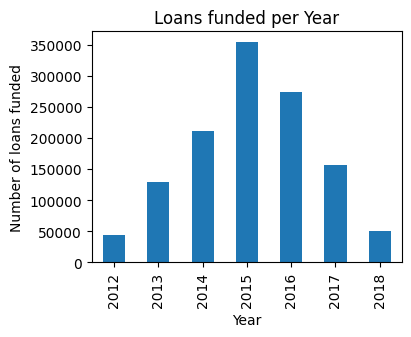

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
data['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.xlabel('Year')
plt.ylabel('Number of loans funded')
plt.title('Loans funded per Year')

nterestingly, the funded loans significantly increased since 2013, and continued through 2015.

We will split the train/test sample at 8:2.



Why is this useful?

The 80th percentile is often used for splitting your data into training and testing sets for machine learning tasks, particularly when dealing with time-series data like loan issue dates. Here's why:

Simulates Real-World Scenario:  Imagine your model predicts loan defaults. In reality, the model wouldn't have access to future loan information. Splitting at the 80th percentile creates a training set with historical data (loans issued before) and a testing set with loans issued later. This helps assess how well the model generalizes to unseen data, similar to how it would perform on future loans.

Preserves Temporal Trends:  Loan performance might change over time due to economic factors or LendingClub's practices. The training data with loans issued before the 80th percentile captures historical trends relevant to predicting future defaults. The model learns these trends to predict defaults in loans issued later (testing set).

Avoids Data Leakage:  If the model were trained on all data, including future loans (testing set), it might "cheat" by learning patterns specific to those loans. This would lead to overfitting, where the model performs well on the training data but poorly on unseen data (future loans). Splitting at the 80th percentile ensures the training data doesn't contain information from the testing set, preventing leakage.

In [97]:
data_train = data.loc[data['issue_d']  < data['issue_d'].quantile(0.8)]
data_test =  data.loc[data['issue_d'] >= data['issue_d'].quantile(0.8)]

In [ ]:
data['issue_d'].quantile(0.8)

In [99]:
print('Number of loans in the partition:   ', data_train.shape[0] + data_test.shape[0])
print('Number of loans in the full dataset:', data.shape[0])

Number of loans in the partition:    1220092
Number of loans in the full dataset: 1220092


summary statistics of the issue dates in the train/test sets.



In [100]:
data_train['issue_d'].describe()

count                           976071
mean     2015-01-31 10:07:48.238888448
min                2012-03-01 00:00:00
25%                2014-05-01 00:00:00
50%                2015-05-01 00:00:00
75%                2015-12-01 00:00:00
max                2016-10-01 00:00:00
Name: issue_d, dtype: object

In [101]:
data_test['issue_d'].describe()

count                           244021
mean     2017-07-13 21:29:25.603780096
min                2016-11-01 00:00:00
25%                2017-02-01 00:00:00
50%                2017-07-01 00:00:00
75%                2017-11-01 00:00:00
max                2018-12-01 00:00:00
Name: issue_d, dtype: object

Now we can delete the "issue_d"

In [102]:
data_train.drop('issue_d', axis=1, inplace=True)
data_test.drop('issue_d', axis=1, inplace=True)

Now separate the predictor variables from the target variable

In [103]:
X_train = data_train.drop(['loan_status'], axis=1)
y_train = data_train.loc[:, 'loan_status']

X_test = data_test.drop(['loan_status'], axis=1)
y_test = data_test['loan_status']

In [104]:
print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (976071, 121)
Shape of the test set:  (244021, 121)
Percentage of classes in the training set:
loan_status
0    0.806103
1    0.193897
Name: proportion, dtype: float64
Percentage of classes in the test set:
loan_status
0    0.789297
1    0.210703
Name: proportion, dtype: float64


In [6]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [7]:


def ks_score(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    ks = max(tpr - fpr)
    return ks



In [8]:
def plot_precision_recall_curve(labels, pre_scores):

    average_precision = metrics.average_precision_score(labels, pre_scores)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    precision, recall, _ = metrics.precision_recall_curve(labels, pre_scores)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

### XG Boost using cleaned data

In [107]:
import time

In [108]:
from xgboost import XGBClassifier

# XGBoost
classifier_xgb = XGBClassifier()

In [109]:
classifier_xgb.fit(X_train, y_train)
y_train_pred = classifier_xgb.predict(X_train)
y_test_pred = classifier_xgb.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 81.40%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.820919       0.616334  0.813987       0.718626   
recall          0.983873       0.107705  0.813987       0.545789   
f1-score        0.895039       0.183367  0.813987       0.539203   
support    786814.000000  189257.000000  0.813987  976071.000000   

            weighted avg  
precision       0.781251  
recall          0.813987  
f1-score        0.757048  
support    976071.000000  
_______________________________________________
Confusion Matrix: 
 [[774125  12689]
 [168873  20384]]

Test Result:
Accuracy Score: 78.98%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.804262      0.505298  0.789809       0.654780       0.741270
recall          0.969700      0.115937  0.78980

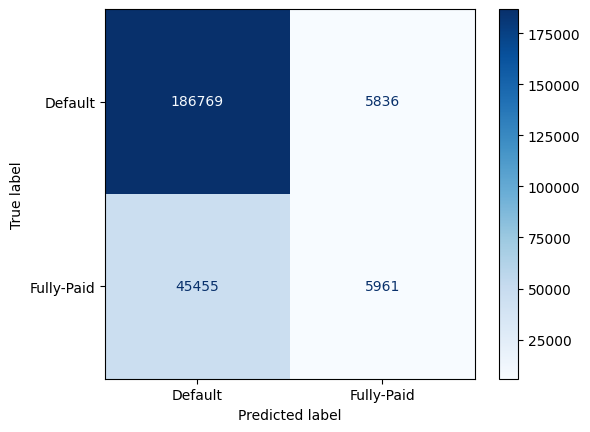

In [110]:
disp = ConfusionMatrixDisplay.from_estimator(
    classifier_xgb, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)


In [111]:
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]

In [114]:

ks = ks_score(y_test, y_pred_prob)
print("KS Score:", ks)

KS Score: 0.3083416353472348


In [ ]:

plot_precision_recall_curve(y_test,y_pred_prob)

In [ ]:
# start = time.time()
# from xgboost import XGBClassifier

# # XGBoost
# classifier_xgb = XGBClassifier()

# start = time.time()
# parameters = {

#     'min_child_weight':(300,500,800),
#     'learning_rate':(0.05, 0.1,0.3),
#     'min_split_loss':(0,0.01,0.1),
#     'max_depth':(2,6,8,10),
#     'lambda':(0.1,0.5,1)
# }


# Grid_XGB = GridSearchCV(XGBClassifier(),parameters, cv=5)
# Grid_XGB.fit(X_train, y_train)
# elapsed = time.time() - start
# print(elapsed)



# **Basic Model - Using Preprocessed Dataset**



Load the preprocessed Data

In [9]:
# Load the data
train_data = pd.read_csv("/content/drive/MyDrive/NUS_SEM_2_(Jan2024_May2024)/Hands on Applied Analytics/Project/Loan Dfault Project/Data/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/NUS_SEM_2_(Jan2024_May2024)/Hands on Applied Analytics/Project/Loan Dfault Project/Data/test.csv")

In [10]:
test_data = test_data.drop('issue_d' , axis=1)
train_data = train_data.drop('issue_d' , axis=1)

## Feature Engineering

Convert target variable to 0/1 indicator

In [11]:
# One hot encoding for Y
class_mapping = {"Fully Paid":0, "Charged Off":1}
train_data['loan_status']=train_data['loan_status'].map(class_mapping)
test_data['loan_status']=test_data['loan_status'].map(class_mapping)

## Encoding

In [12]:
categorical_columns = test_data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'application_type']

In [9]:
for column in categorical_columns:
    unique_values = test_data[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'sub_grade' has 35 unique values.
Column 'home_ownership' has 4 unique values.
Column 'verification_status' has 3 unique values.
Column 'purpose' has 13 unique values.
Column 'addr_state' has 50 unique values.
Column 'application_type' has 2 unique values.


##  One hot Encoding


In [13]:
cat_columns_ohe = ['home_ownership', 'verification_status', 'application_type','addr_state', 'sub_grade', 'purpose' ]


In [14]:
combined_df = pd.concat([train_data, test_data], axis=0)
combined_df.reset_index(drop=True, inplace=True)
encoded_combined_df = pd.get_dummies(combined_df, columns=cat_columns_ohe, drop_first=True, prefix={col: col for col in cat_columns_ohe})
encoded_combined_df.reset_index(drop=True, inplace=True)

In [15]:
train_data = encoded_combined_df.iloc[:len(train_data)]
train_data.reset_index(drop=True, inplace=True)
test_data = encoded_combined_df.iloc[len(train_data):]
test_data.reset_index(drop=True, inplace=True)

In [16]:
X_train = train_data.drop(['loan_status'], axis=1)
y_train = train_data.loc[:, 'loan_status']

X_test = test_data.drop(['loan_status'], axis=1)
y_test = test_data['loan_status']

In [17]:
X_test = X_test[X_train.columns]

In [18]:
X_test.tail()

,loan_amnt,term (months),int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,fico_avg,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_Joint App,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
127123,16000.0,60,18.06,406.82,50000.0,8.28,6,0,1393.0,24.0,17,3.0,667.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
127124,10000.0,60,28.72,315.72,48000.0,16.08,11,0,5314.0,59.0,12,0.0,662.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
127125,17950.0,60,30.17,582.62,53758.0,33.24,11,1,5959.0,35.9,24,3.0,682.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
127126,18000.0,60,30.65,589.57,77000.0,8.08,9,0,10100.0,45.1,15,1.0,667.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [19]:
print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (1015112, 115)
Shape of the test set:  (127128, 115)
Percentage of classes in the training set:
loan_status
0    0.80311
1    0.19689
Name: proportion, dtype: float64
Percentage of classes in the test set:
loan_status
0    0.805251
1    0.194749
Name: proportion, dtype: float64


## XG Boost on pre processed one

In [126]:
import time

In [127]:
from xgboost import XGBClassifier

# XGBoost
# classifier_xgb = XGBClassifier(eval_metric="aucpr")
classifier_xgb = XGBClassifier()

In [128]:
classifier_xgb.fit(X_train, y_train)
y_train_pred = classifier_xgb.predict(X_train)
y_test_pred = classifier_xgb.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 81.01%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy     macro avg  weighted avg
precision       0.816846       0.608692  0.810127  7.127690e-01  7.758629e-01
recall          0.984272       0.099792  0.810127  5.420323e-01  8.101274e-01
f1-score        0.892778       0.171473  0.810127  5.321251e-01  7.507602e-01
support    815247.000000  199865.000000  0.810127  1.015112e+06  1.015112e+06
_______________________________________________
Confusion Matrix: 
 [[802425  12822]
 [179920  19945]]

Test Result:
Accuracy Score: 80.70%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.818555      0.522484  0.807006       0.670519       0.760895
recall          0.976868      0.104653  0.807006       0.540761       0.807006
f1-score        0.890732      0.174378  0.807006      

In [130]:
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]

In [131]:
ks = ks_score(y_test, y_pred_prob)
print("KS Score:", ks)

KS Score: 0.3291154079213661


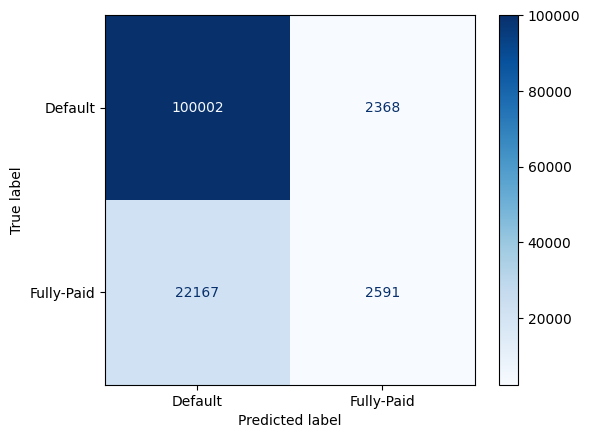

In [132]:
disp = ConfusionMatrixDisplay.from_estimator(
    classifier_xgb, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)


Average precision-recall score: 0.38


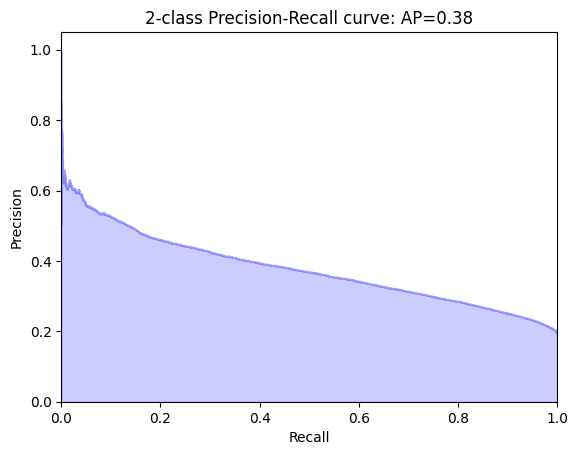

In [133]:
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
plot_precision_recall_curve(y_test,y_pred_prob)

Average precision calculated here is the area under the precision-recall curve which is also called as average precision.

# Basic Model - Using Preprocessed Dataset,Imbalanced Data, Tuning,

## Feature Engineering

Convert target variable to 0/1 indicator

In [21]:
# One hot encoding for Y
class_mapping = {"Fully Paid":0, "Charged Off":1}
train_data['loan_status']=train_data['loan_status'].map(class_mapping)
test_data['loan_status']=test_data['loan_status'].map(class_mapping)

## Encoding

In [ ]:
categorical_columns = test_data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'application_type']

In [ ]:
for column in categorical_columns:
    unique_values = test_data[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'sub_grade' has 35 unique values.
Column 'home_ownership' has 4 unique values.
Column 'verification_status' has 3 unique values.
Column 'purpose' has 13 unique values.
Column 'addr_state' has 50 unique values.
Column 'application_type' has 2 unique values.


##  One hot Encoding


In [ ]:
cat_columns_ohe = ['home_ownership', 'verification_status', 'application_type','addr_state', 'sub_grade', 'purpose' ]


In [ ]:
combined_df = pd.concat([train_data, test_data], axis=0)
combined_df.reset_index(drop=True, inplace=True)
encoded_combined_df = pd.get_dummies(combined_df, columns=cat_columns_ohe, drop_first=True, prefix={col: col for col in cat_columns_ohe})
encoded_combined_df.reset_index(drop=True, inplace=True)

In [ ]:
train_data = encoded_combined_df.iloc[:len(train_data)]
train_data.reset_index(drop=True, inplace=True)
test_data = encoded_combined_df.iloc[len(train_data):]
test_data.reset_index(drop=True, inplace=True)

In [ ]:
X_train = train_data.drop(['loan_status'], axis=1)
y_train = train_data.loc[:, 'loan_status']

X_test = test_data.drop(['loan_status'], axis=1)
y_test = test_data['loan_status']

In [134]:
print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (1015112, 115)
Shape of the test set:  (127128, 115)
Percentage of classes in the training set:
loan_status
0    0.80311
1    0.19689
Name: proportion, dtype: float64
Percentage of classes in the test set:
loan_status
0    0.805251
1    0.194749
Name: proportion, dtype: float64


In [ ]:
X_test = X_test[X_train.columns]

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV


In [141]:
# Choose the type of classifier.

xgb = XGBClassifier(booster = "gbtree", random_state = 123, n_jobs=4,eval_metric="aucpr" )


# Grid of parameters to choose from

parameters = {'max_depth':range(3,10,2),
            'min_child_weight':range(1,6,2),
            'learning_rate': [0.30000012],
            'max_bin':[256],
            'n_estimators':[100, 200]
             }


# Type of scoring used to compare parameter combinations

# scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search

xgb_model = RandomizedSearchCV(xgb, parameters, scoring = "f1_weighted", cv = 3)


#fit the Random Search on train dataset

xgb_model = xgb_model.fit(X_train, y_train)


# Set the clf to the best combination of parameters

xgb_estimator_tuned = xgb_model.best_estimator_


# Fit the best algorithm to the data.

xgb_estimator_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.30000012,
              max_bin=256, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=4,
              num_parallel_tree=None, random_state=123, ...)

In [142]:
y_train_pred = xgb_estimator_tuned.predict(X_train)
y_test_pred = xgb_estimator_tuned.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 82.25%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy     macro avg  weighted avg
precision       0.826717       0.727058  0.822469  7.768878e-01  8.070954e-01
recall          0.985512       0.157416  0.822469  5.714643e-01  8.224689e-01
f1-score        0.899158       0.258800  0.822469  5.789786e-01  7.730778e-01
support    815247.000000  199865.000000  0.822469  1.015112e+06  1.015112e+06
_______________________________________________
Confusion Matrix: 
 [[803436  11811]
 [168403  31462]]

Test Result:
Accuracy Score: 80.51%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.820070      0.497890  0.805055       0.658980       0.757326
recall          0.970939      0.119153  0.805055       0.545046       0.805055
f1-score        0.889150      0.192289  0.805055      

In [143]:
from sklearn.metrics import f1_score

f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Weighted Score:", f1_weighted)

F1 Weighted Score: 0.7534375159682722


In [144]:
y_pred_prob = xgb_estimator_tuned.predict_proba(X_test)[:,1]

In [145]:
ks = ks_score(y_test, y_pred_prob)
print("KS Score:", ks)

KS Score: 0.3172817458324312


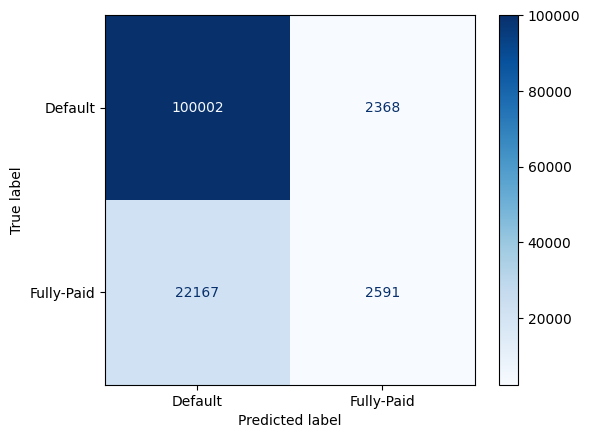

In [146]:
disp = ConfusionMatrixDisplay.from_estimator(
    classifier_xgb, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)


Average precision-recall score: 0.38


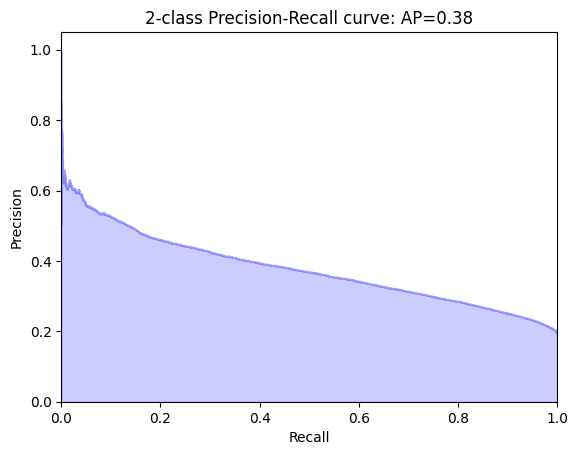

In [147]:
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
plot_precision_recall_curve(y_test,y_pred_prob)

Average precision calculated here is the area under the precision-recall curve which is also called as average precision.

# **XGBoost, Preprocessed dataset, Balanced(SMOTE)**

In [20]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data only
sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [22]:
print("Shape of the training set: ", X_train_res.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train_res.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (1630494, 115)
Shape of the test set:  (127128, 115)
Percentage of classes in the training set:
loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64
Percentage of classes in the test set:
loan_status
0    0.805251
1    0.194749
Name: proportion, dtype: float64


In [23]:

# xgb = XGBClassifier(booster = "gbtree", random_state = 123, n_jobs=4,eval_metric="aucpr" )
# Choose the type of classifier.

xgb_estimator_tuned_smote = XGBClassifier(booster = "gbtree", random_state = 123, n_jobs=4,eval_metric="aucpr" )



In [24]:
pipeline = make_pipeline(
    RandomUnderSampler(random_state=42),  # Apply RandomUnderSampler to undersample the majority class
    xgb_estimator_tuned_smote)

In [25]:
parameters = {"xgbclassifier__max_depth":range(3,10,2),
            "xgbclassifier__min_child_weight":range(1,6,2),
            "xgbclassifier__learning_rate": [0.30000012],
            "xgbclassifier__n_estimators":[100, 200]
             }

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)


# Run the grid search

xgb_model = RandomizedSearchCV(pipeline, parameters, scoring = scorer, cv = 3)


#fit the GridSearch on train dataset

xgb_model = xgb_model.fit(X_train_res, y_train_res)


# Set the clf to the best combination of parameters

xgb_estimator_tuned_smote = xgb_model.best_estimator_


# Fit the best algorithm to the data.

xgb_estimator_tuned_smote.fit(X_train_res, y_train_res)

Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               device=None, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='aucpr',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.30000012, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=4,
                               num_parallel_tree=None, random_state=123, ...))])

In [26]:
y_train_pred = xgb_estimator_tuned_smote.predict(X_train_res)
y_test_pred = xgb_estimator_tuned_smote.predict(X_test)

print_score(y_train_res, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 87.08%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy     macro avg  weighted avg
precision       0.810916       0.959220  0.870789  8.850680e-01  8.850680e-01
recall          0.967073       0.774505  0.870789  8.707889e-01  8.707889e-01
f1-score        0.882137       0.857022  0.870789  8.695798e-01  8.695798e-01
support    815247.000000  815247.000000  0.870789  1.630494e+06  1.630494e+06
_______________________________________________
Confusion Matrix: 
 [[788403  26844]
 [183834 631413]]

Test Result:
Accuracy Score: 79.21%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.817617      0.389989  0.792146       0.603803       0.734337
recall          0.954879      0.119275  0.792146       0.537077       0.792146
f1-score        0.880933      0.182679  0.792146      

In [27]:
from sklearn.metrics import f1_score

f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Weighted Score:", f1_weighted)

F1 Weighted Score: 0.7449491672087801


In [28]:
y_pred_prob = xgb_estimator_tuned.predict_proba(X_test)[:,1]

NameError: name 'xgb_estimator_tuned' is not defined

In [ ]:
ks = ks_score(y_test, y_pred_prob)
print("KS Score:", ks)

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    classifier_xgb, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)


In [ ]:
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
plot_precision_recall_curve(y_test,y_pred_prob)

In [22]:
pipeline = make_pipeline(
    SMOTE(random_state=42),  # Apply SMOTE to oversample the minority class
    RandomUnderSampler(random_state=42),  # Apply RandomUnderSampler to undersample the majority class
    xgb)

In [ ]:

# Grid of parameters to choose from

# parameters = {'max_depth':range(3,10,2),
#             'min_child_weight':range(1,6,2),
#             'learning_rate': [0.30000012],
#             'max_bin':[256],
#             'n_estimators':[100, 200]
#              }


parameters = {"xgbclassifier__max_depth":range(3,10,2),
            "xgbclassifier__min_child_weight":range(1,6,2),
            "xgbclassifier__learning_rate": [0.30000012],
            "xgbclassifier__n_estimators":[100, 200]
             }

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)


# Run the grid search

xgb_model = RandomizedSearchCV(pipeline, parameters, scoring = scorer, cv = 3)


#fit the GridSearch on train dataset

xgb_model = xgb_model.fit(X_train, y_train)


# Set the clf to the best combination of parameters

xgb_estimator_tuned_smote = xgb_model.best_estimator_


# Fit the best algorithm to the data.

xgb_estimator_tuned_smote.fit(X_train, y_train)

In [ ]:
y_train_pred = xgb_estimator_tuned_smote.predict(X_train)
y_test_pred = xgb_estimator_tuned_smote.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 82.25%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy     macro avg  weighted avg
precision       0.826717       0.727058  0.822469  7.768878e-01  8.070954e-01
recall          0.985512       0.157416  0.822469  5.714643e-01  8.224689e-01
f1-score        0.899158       0.258800  0.822469  5.789786e-01  7.730778e-01
support    815247.000000  199865.000000  0.822469  1.015112e+06  1.015112e+06
_______________________________________________
Confusion Matrix: 
 [[803436  11811]
 [168403  31462]]

Test Result:
Accuracy Score: 80.51%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.820070      0.497890  0.805055       0.658980       0.757326
recall          0.970939      0.119153  0.805055       0.545046       0.805055
f1-score        0.889150      0.192289  0.805055      

In [ ]:
from sklearn.metrics import f1_score

f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Weighted Score:", f1_weighted)

F1 Weighted Score: 0.7534375159682722


In [ ]:
y_pred_prob = xgb_estimator_tuned.predict_proba(X_test)[:,1]

In [ ]:
ks = ks_score(y_test, y_pred_prob)
print("KS Score:", ks)

KS Score: 0.3172817458324312


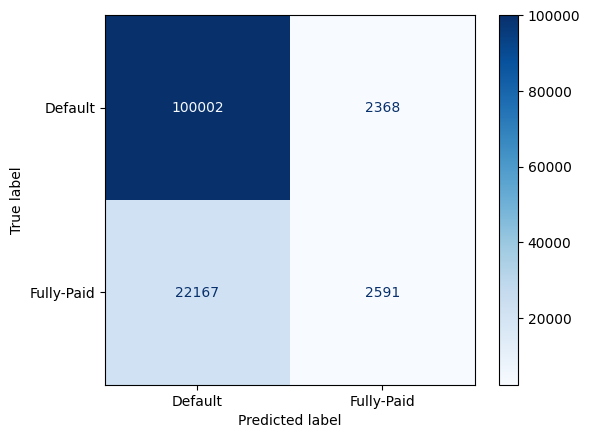

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    classifier_xgb, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)


Average precision-recall score: 0.38


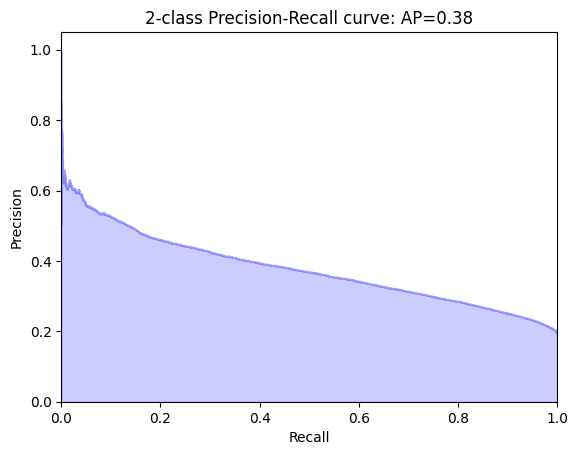

In [ ]:
y_pred_prob = classifier_xgb.predict_proba(X_test)[:,1]
plot_precision_recall_curve(y_test,y_pred_prob)